# #Titanic Survival Prediction
#Here i build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).
and i got 90.67% accuracy on test set.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df2 = pd.read_csv('train.csv')    # loading training set

In [3]:
df2.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


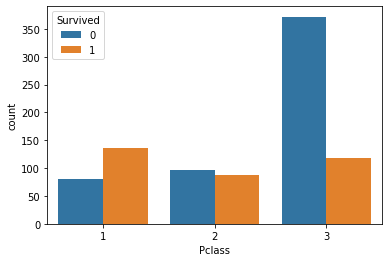

In [4]:
sns.countplot('Pclass',data = df2,hue ='Survived')  # This plot shows how survived is disributed among each class

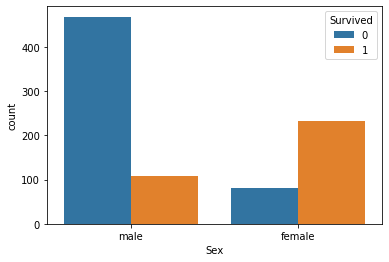

In [5]:
sns.countplot('Sex',data = df2,hue ='Survived')     #This plot shows how survived is between gender

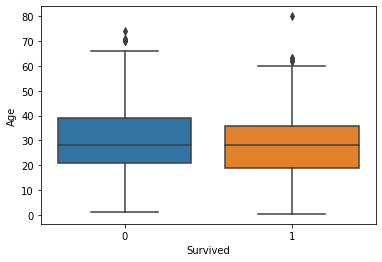

In [6]:
sns.boxplot(x = 'Survived',y = 'Age',data = df2)      #This plot shows how survived is disributed vs age

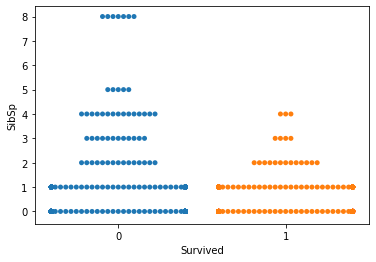

In [7]:
sns.swarmplot(x = 'Survived',y = 'SibSp',data = df2) # This plot shows how survived is disributed vs SibSp

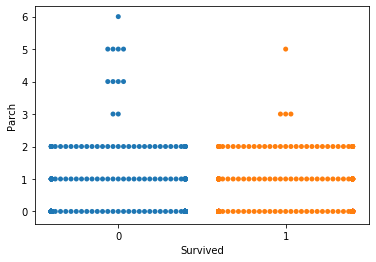

In [8]:
sns.swarmplot(x = 'Survived',y = 'Parch',data = df2) # This plot shows how survived is disributed vs Parch

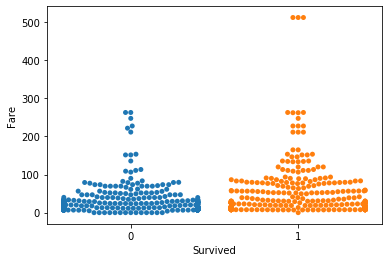

In [9]:
sns.swarmplot(x = 'Survived',y = 'Fare',data = df2)      #This plot shows how survived is disributed vs Fare

In [10]:
df2['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

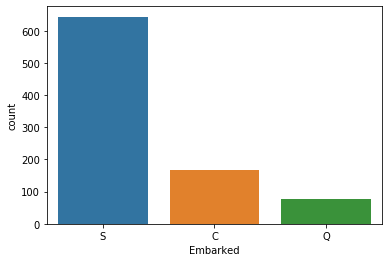

In [11]:
sns.countplot('Embarked',data = df2)

In [12]:
df2['Embarked'] = df2['Embarked'].fillna('S')
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:
mapping = {'S': 1, 'C': 2,'Q' :3}
df2 = df2.replace({'Embarked': mapping})

In [15]:
mapping = {'male': 0, 'female': 1}
df2 = df2.replace({'Sex': mapping})

In [16]:
df3 = df2[['Survived','Pclass','Sex','Age','Embarked','SibSp','Parch','Fare']]
df4 = df3.dropna()


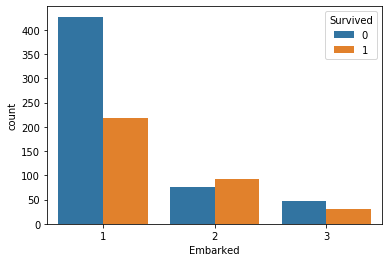

In [178]:
sns.countplot('Embarked',data = df2,hue = 'Survived')    #important feature

In [79]:
x= df4[['Pclass','Sex','Age','Embarked','SibSp','Parch','Fare']]
x

,Pclass,Sex,Age,Embarked,SibSp,Parch,Fare
0,3,0,22.0,1,1,0,7.2500
1,1,1,38.0,2,1,0,71.2833
2,3,1,26.0,1,0,0,7.9250
3,1,1,35.0,1,1,0,53.1000
4,3,0,35.0,1,0,0,8.0500
...,...,...,...,...,...,...,...
885,3,1,39.0,3,0,5,29.1250
886,2,0,27.0,1,0,0,13.0000
887,1,1,19.0,1,0,0,30.0000
889,1,0,26.0,2,0,0,30.0000


In [80]:
y = df4['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
lmodel = LogisticRegression()

In [83]:
lmodel.fit(x,y)

c:\users\dharmendra gupta\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
df5 = pd.read_csv('test.csv')
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [85]:
df6 = df5[['PassengerId','Pclass','Sex','Age','Embarked','SibSp','Parch','Fare']]
df6['PassengerId']

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [86]:
df5 = df5[['Pclass','Sex','Age','Embarked','SibSp','Parch','Fare']]

In [87]:
mapping = {'S': 1, 'C': 2,'Q' :3}
df5 = df5.replace({'Embarked': mapping})

In [88]:
mapping = {'male': 0, 'female': 1}
df5 = df5.replace({'Sex': mapping})

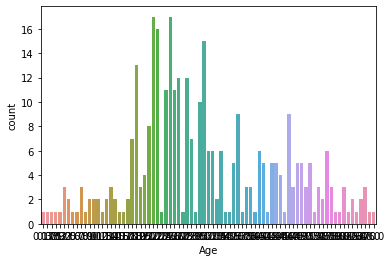

In [89]:

sns.countplot('Age',data = df5)

In [90]:

df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null int64
Age         332 non-null float64
Embarked    418 non-null int64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        417 non-null float64
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


In [91]:
df5['Age'].mean()

30.272590361445783

In [92]:
df5 = df5.fillna(30)
df5

,Pclass,Sex,Age,Embarked,SibSp,Parch,Fare
0,3,0,34.5,3,0,0,7.8292
1,3,1,47.0,1,1,0,7.0000
2,2,0,62.0,3,0,0,9.6875
3,3,0,27.0,1,0,0,8.6625
4,3,1,22.0,1,1,1,12.2875
...,...,...,...,...,...,...,...
413,3,0,30.0,1,0,0,8.0500
414,1,1,39.0,2,0,0,108.9000
415,3,0,38.5,1,0,0,7.2500
416,3,0,30.0,1,0,0,8.0500


In [94]:
predictions = lmodel.predict(df5)


In [95]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [9]:
q  = pd.read_csv('gender_submission.csv')
q = q['Survived']
q

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [102]:
from sklearn.metrics import classification_report

In [103]:
classification_report(q,predictions)

'              precision    recall  f1-score   support\n\n           0       0.94      0.91      0.93       266\n           1       0.85      0.90      0.88       152\n\n    accuracy                           0.91       418\n   macro avg       0.90      0.91      0.90       418\nweighted avg       0.91      0.91      0.91       418\n'

In [104]:
from sklearn.metrics import confusion_matrix

In [106]:
from sklearn.metrics import accuracy_score

In [108]:
accuracy_score(q,predictions)

0.9066985645933014